# This is a VERY experimental notebook to perform simple EDA on the ATUS data.
Changes will be made frequently and it will be moved to the main folder when ready!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
filename = 'all_by_year.csv'
data = pd.read_csv(filename, index_col=0).reset_index(drop=True)

In [5]:
data.head(5)

,series_id,year,education,gender,ethnicity,age,activity,avg_time_per_week,std_err
0,TUU10101AA01008829,2018,All education levels,Both sexes,All races,15 years and over,Personal care activities (includes travel),9.58,0.034
1,TUU10101AA01008829,2017,All education levels,Both sexes,All races,15 years and over,Personal care activities (includes travel),9.59,0.025
2,TUU10101AA01008829,2016,All education levels,Both sexes,All races,15 years and over,Personal care activities (includes travel),9.58,0.028
3,TUU10101AA01008829,2015,All education levels,Both sexes,All races,15 years and over,Personal care activities (includes travel),9.64,0.028
4,TUU10101AA01008829,2014,All education levels,Both sexes,All races,15 years and over,Personal care activities (includes travel),9.58,0.027


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   series_id          132 non-null    object 
 1   year               132 non-null    int64  
 2   education          132 non-null    object 
 3   gender             132 non-null    object 
 4   ethnicity          132 non-null    object 
 5   age                132 non-null    object 
 6   activity           132 non-null    object 
 7   avg_time_per_week  132 non-null    float64
 8   std_err            132 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 9.4+ KB


In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
data.groupby(['activity']).describe()['avg_time_per_week']

,count,mean,std,min,25%,50%,75%,max
activity,,,,,,,,
Caring for and helping household members (includes travel),11.0,0.520909,0.012210,0.51,0.510,0.52,0.530,0.54
Caring for and helping nonhousehold members (includes travel),11.0,0.200000,0.016733,0.18,0.185,0.21,0.210,0.23
Eating and drinking (includes travel),11.0,1.210000,0.032249,1.17,1.180,1.22,1.235,1.25
Educational activities (includes travel),11.0,0.469091,0.020715,0.42,0.460,0.47,0.480,0.50
Household activities (includes travel),11.0,1.784545,0.032669,1.73,1.770,1.78,1.805,1.84
Leisure and sports (includes travel),11.0,5.236364,0.065463,5.13,5.195,5.24,5.265,5.37
"Organizational, civic, and religious activities",11.0,0.328182,0.014709,0.30,0.320,0.33,0.335,0.35
"Other activities, not elsewhere classified (includes misc. travel and data codes)",11.0,0.248182,0.050362,0.19,0.210,0.24,0.275,0.35
Personal care activities (includes travel),11.0,9.527273,0.074845,9.39,9.480,9.54,9.580,9.64


In [77]:
#Call something by its data
by_year = data.loc[data['year']== 2008]

In [ ]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
data.groupby(['year', 'activity']).describe()['avg_time_per_week'] #not useful here, but with another dimention

In [237]:
sns.plotting_context()

{'font.size': 12.0,
 'axes.labelsize': 12.0,
 'axes.titlesize': 12.0,
 'xtick.labelsize': 11.0,
 'ytick.labelsize': 11.0,
 'legend.fontsize': 11.0,
 'axes.linewidth': 1.25,
 'grid.linewidth': 1.0,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 1.25,
 'ytick.major.width': 1.25,
 'xtick.minor.width': 1.0,
 'ytick.minor.width': 1.0,
 'xtick.major.size': 6.0,
 'ytick.major.size': 6.0,
 'xtick.minor.size': 4.0,
 'ytick.minor.size': 4.0}

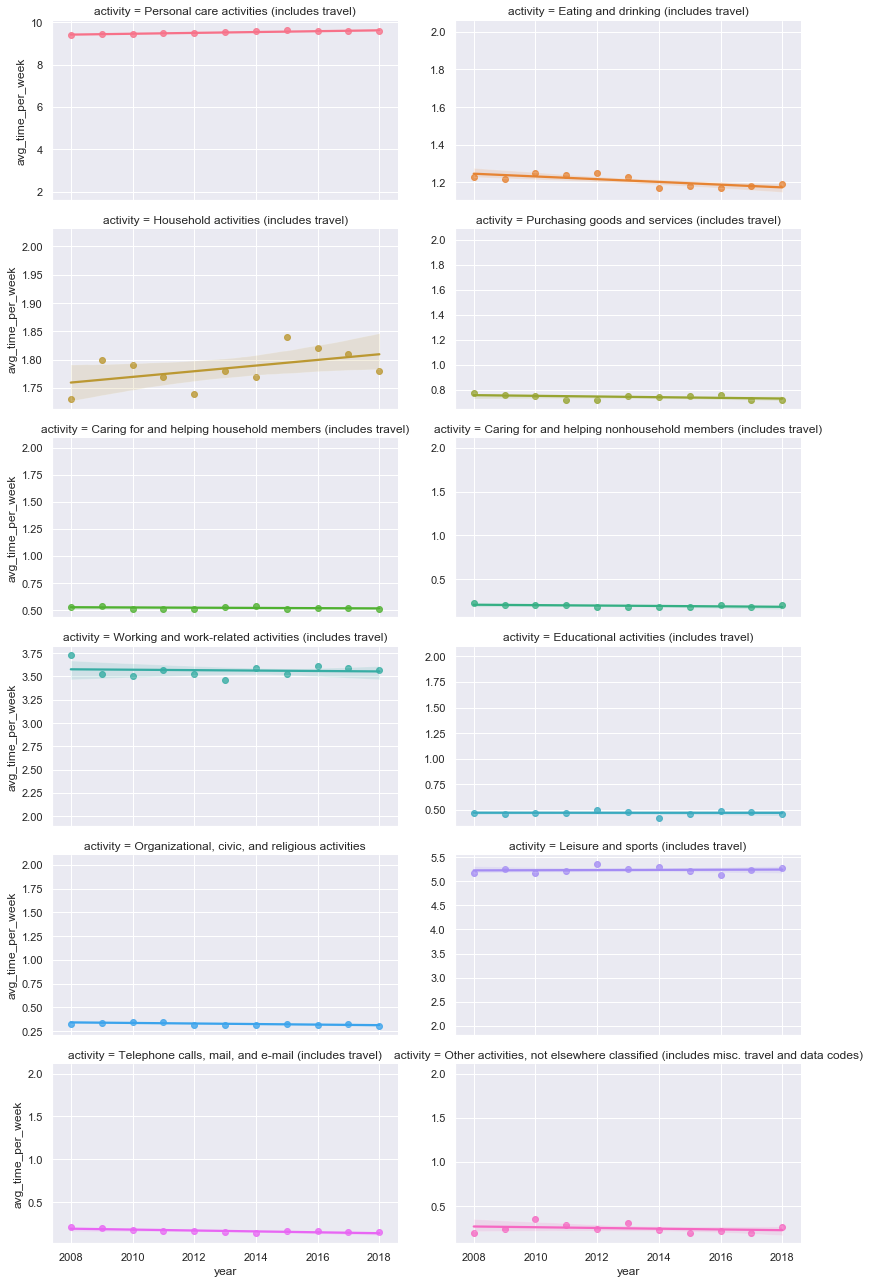

In [197]:
personal = data.loc[data['activity']== 'Personal care activities (includes travel)']
#h = sns.FacetGrid(data, col='activity', col_wrap = 2, height = 5, aspect = 2,sharey=False)
h = sns.lmplot(x='year', y='avg_time_per_week', col='activity', col_wrap = 2, sharey = False, height=3, aspect = 2, data=data, hue = 'activity')

# Start Bokeh

In [8]:
import yaml

from bokeh.layouts import column
from bokeh.embed import file_html
from bokeh.layouts import layout, grid
from bokeh.models import ColumnDataSource, Slider, HoverTool, Legend
from bokeh.plotting import figure
from bokeh.themes import Theme
from bokeh.io import show, output_notebook, output_file
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20
from bokeh.resources import INLINE
import pandas as pd
import numpy as np
from bokeh.sampledata.sea_surface_temperature import sea_surface_temperature

output_notebook()

Loading BokehJS ...

# Static Bokeh

In [15]:
df = pd.read_csv('all_by_year.csv')
output_file("bar_pandas_groupby_colormapped_static.html")

df.activity = df.activity.astype(str)
led = df.activity.unique().tolist()
group = df.groupby('activity')

cyl_cmap = factor_cmap('activity', palette=Category20[19], factors=sorted(df.activity.unique()))

p = figure(plot_height=700, width=700, x_range=group, title="Average Time Spent on Activity Per Week (Avg of 2008-2018)")

p.vbar(x='activity', top='avg_time_per_week_mean', width=1, source=group,
line_color=cyl_cmap, fill_color=cyl_cmap)
       
p.y_range.start = 0
p.xgrid.grid_line_color = None
p.xaxis.axis_label = None
p.xaxis.major_label_orientation = 1.5
p.yaxis.axis_label = 'Average Time per Week (hrs)'
p.outline_line_color = None

show(p)

# Embeded Bokeh server

In [11]:
def bkapp(doc):
    df = pd.read_csv('all_by_year.csv')
    output_file("bar_pandas_groupby_colormapped.html")

    df.activity = df.activity.astype(str)
    led = df.activity.unique().tolist()
    group = df.groupby('activity')

    cyl_cmap = factor_cmap('activity', palette=Category20[19], factors=sorted(df.activity.unique()))

    p = figure(plot_height=700, width=700, x_range=group, title="Average Time Spent on Activity Per Week (Avg of 2008-2018)")

    r1 = p.vbar(x='activity', top='avg_time_per_week_mean', width=1, source=group,
       line_color=cyl_cmap, fill_color=cyl_cmap)
       
    p.y_range.start = 0
    p.xgrid.grid_line_color = None
    p.xaxis.axis_label = None
    p.xaxis.major_label_orientation = 1.5
    p.yaxis.axis_label = 'Average Time per Week (hrs)'
    p.outline_line_color = None

   
    doc.add_root(column(p))

    doc.theme = Theme(json=yaml.load("""
        attrs:
            Figure:
                background_fill_color: "#DDDDDD"
                outline_line_color: white
                toolbar_location: above
                height: 800
                width: 800
            Grid:
                grid_line_dash: [6, 4]
                grid_line_color: white
    """, Loader=yaml.FullLoader))

In [12]:
show(bkapp, notebook_url='localhost:8888')